<a href="https://colab.research.google.com/github/Dinaka-Alade/HR-Analytics-Job-Change-of-Data-Scientists/blob/main/HR_Analytics_Job_Change_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importing Required Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pickle
import seaborn as sn
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2) Importing Cleaned Data


In [105]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))
df.head()

Saving cleaned_data.csv to cleaned_data (1).csv


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1.0
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,city_21,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0.0
3,city_115,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1.0
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


### Here Target = 0 means 'Not Looking for Job Change'<br> 
### Target = 1 means 'Looking for Job Change'

# 3) Data Visualization

## 3.1) Plot of Gender vs. Target

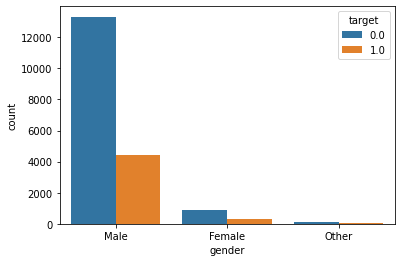

In [3]:
sn.countplot(data=df,x='gender',hue='target')

## 3.2) Plot of Relevant Experience vs. Target

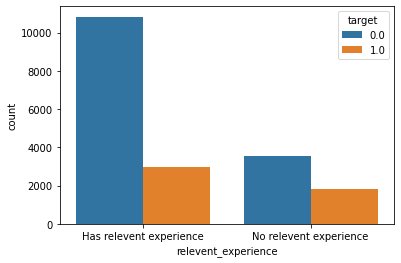

In [4]:
sn.countplot(data=df,x='relevent_experience',hue='target')

## 3.3) Plot of Enrolled University vs. Target

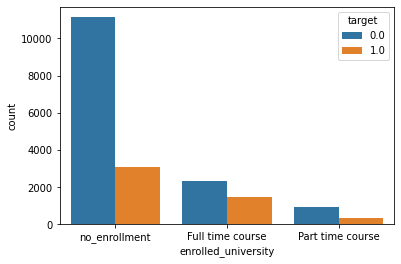

In [5]:
sn.countplot(data=df,x='enrolled_university',hue='target')

## 3.4) Plot of Education Level vs. Target

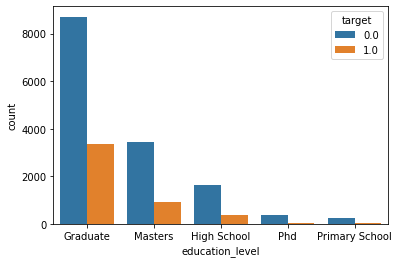

In [6]:
sn.countplot(data=df,x='education_level',hue='target')

## 3.5) Plot of Discipline vs. Target

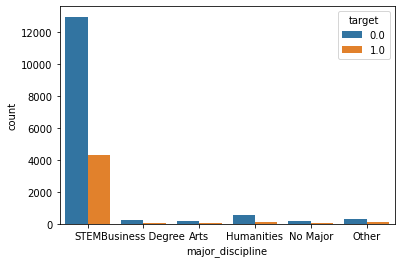

In [7]:
sn.countplot(data=df,x='major_discipline',hue='target')

## 3.6) Plot of Experience vs. Target

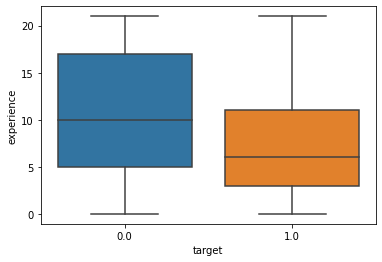

In [8]:
sn.boxplot(data=df, x='target', y='experience')

## 3.7) Plot of Company Size vs. Target

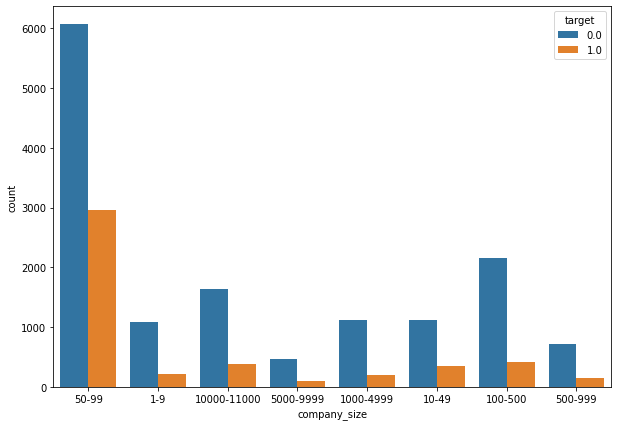

In [9]:
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='company_size',hue='target')

## 3.8) Plot of Company Type vs Target

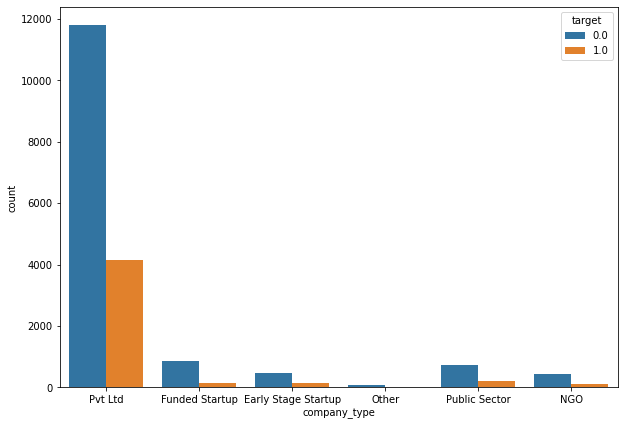

In [10]:
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='company_type',hue='target')

## 3.9) Plot of Last New Job vs. Target

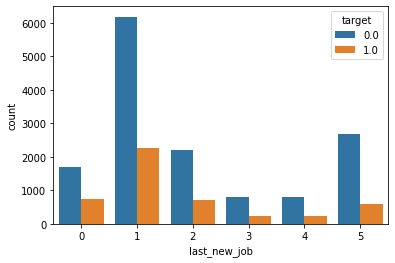

In [11]:
sn.countplot(data=df,x='last_new_job',hue='target')

## 3.10) Plot of Training Hours vs. Target

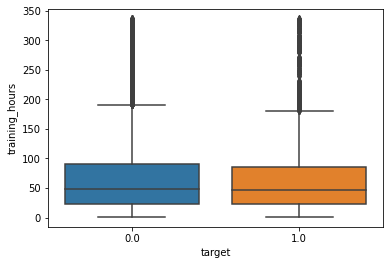

In [12]:
sn.boxplot(data=df,y='training_hours',x='target')

## 3.11) Results

### As we can see, the dataset is imbalanced

In [106]:
df_target1 = df[df.target==1]
df_target0 = df[df.target==0]

In [107]:
print(len(df_target1),len(df_target0))

4777 14381


# 4) Data Exploration and Preprocessing

In [108]:
df.shape

(19158, 12)

In [109]:
df.nunique()

city                   123
gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
training_hours         241
target                   2
dtype: int64

## Using Label Encoder to Convert Categorical Variables to Numeric

In [110]:
LE = LabelEncoder()

In [111]:
cols = df.select_dtypes(include=['object']).columns
df[cols]=df[cols].apply(LE.fit_transform)
df.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,1,0,2,0,5,21,5,5,1,36,1.0
1,77,1,1,2,0,5,15,5,5,5,47,0.0
2,64,1,1,0,0,5,5,5,5,0,83,0.0
3,14,1,1,2,0,1,0,5,5,0,52,1.0
4,50,1,0,2,2,5,21,5,1,4,8,0.0


# 5) Heatmap to get Correlation of each attribute with target 

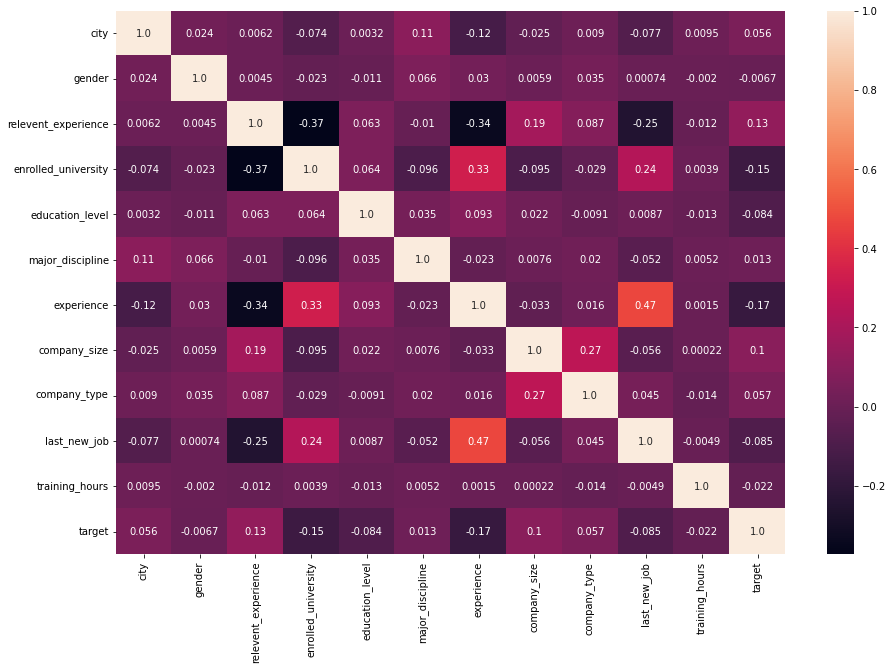

In [112]:
corr = df.corr()
plt.figure(figsize=(15,10))
sn.heatmap(corr,annot=True,fmt='.2')

## Results <br>
As we can see, the five attributes with the highest correlation are:<br>
1) Experience<br>
2) Enrolled University<br>
3) Relevant Experience<br>
4) Company Size<br>
5) Last New Job<br>
 <br>


# 6) Handling Imbalance using SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique<br>
ENN stands for Edited Nearest Neighbors<br>
df_target1 is the minority class<br>
We need to balance by upsampling number of values

In [101]:
smote = SMOTE(random_state=42)

In [113]:
inputs = df[['experience','enrolled_university','relevent_experience','company_size','last_new_job']]
target = df['target']

inputs.head()

,experience,enrolled_university,relevent_experience,company_size,last_new_job
0,21,2,0,5,1
1,15,2,1,5,5
2,5,0,1,5,0
3,0,2,1,5,0
4,21,2,0,5,4


In [114]:
inputs, target = smote.fit_resample(inputs, target)

In [115]:
len(inputs)

28762

# 7) Splitting Dataset into Training Set and Test Set 

In [116]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=40)

In [117]:
len(x_train)

21571

In [118]:
len(x_test)

7191

# 8) Testing Models and Comparing Accuracy

# 8.1) Linear Regression

In [119]:
LM = linear_model.LinearRegression()
LM.fit(x_train, y_train)

LinearRegression()

In [120]:
LM.coef_

array([-0.01387018, -0.06152487, -0.01095591,  0.02745804,  0.00272173])

In [121]:
LM.intercept_

0.6093047016416949

In [122]:
LM.score(x_test, y_test)

0.06023333428014632

# 8.2) Naive Bayes

In [123]:
GNB = GaussianNB()
MNB = MultinomialNB()

GNB.fit(x_train, y_train)
MNB.fit(x_train, y_train)

MultinomialNB()

In [124]:
GNB.score(x_test, y_test)

0.5961618690029203

In [125]:
MNB.score(x_test, y_test)

0.5935196773744958

# 8.3) Decision Tree

In [126]:
DT = tree.DecisionTreeClassifier()

DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [127]:
DT.score(x_test, y_test)

0.6648588513419552

# 8.4) Support Vector Machine

In [128]:
sv = SVC()

sv.fit(x_train, y_train)

SVC()

In [129]:
sv.score(x_test, y_test)

0.605340008343763

# 8.5) Random Forest Classifier

In [130]:
RFC = RandomForestClassifier()

RFC.fit(x_train, y_train)

RandomForestClassifier()

In [131]:
RFC.score(x_test, y_test)

0.6668057293839522

# 8.6) XGB Classifier

In [132]:
xgc = XGBClassifier()
xgc.fit(inputs, target)

XGBClassifier()

In [133]:
xgc.score(x_test, y_test)

0.6334306772354332

# 8.7) Results<br>
### We found that Random Forest Classifier give us the best results<br> <br>

# 9) Hyper Parameter Tuning using RandomSearchCV

In [134]:
rs = RandomizedSearchCV(RandomForestClassifier(),{
    'max_depth':[2, 3, 5, 8],                                     # Defines the longest path allowed between root node and leaf node
    'n_estimators':[100, 150, 200, 300],                          # Number of Trees
    'max_samples':[0.1, 0.2, 0.3]                                 # Fraction of Original Dataset to be given to each tree
    },
      cv=5,
      return_train_score=False,
      n_iter=10
    )

In [135]:
rs.fit(inputs, target)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 8],
                                        'max_samples': [0.1, 0.2, 0.3],
                                        'n_estimators': [100, 150, 200, 300]})

In [136]:
pd.DataFrame(rs.cv_results_)[['param_max_depth','param_n_estimators','param_max_samples','mean_test_score']]


,param_max_depth,param_n_estimators,param_max_samples,mean_test_score
0,5,100,0.2,0.622210
1,8,100,0.2,0.646722
2,8,150,0.3,0.645783
3,8,150,0.2,0.645053
4,3,200,0.3,0.612336
5,5,100,0.3,0.623288
6,5,150,0.1,0.621584
7,2,100,0.1,0.610250
8,8,200,0.2,0.647000
9,8,200,0.3,0.646235


# 10) Final Model

In [137]:
RFC = RandomForestClassifier(n_estimators=2000,max_depth=200)

RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=200, n_estimators=2000)

In [138]:
RFC.score(x_test, y_test)

0.6681963565568071

# 11) Confusion Matrix

In [139]:
y_pred = RFC.predict(x_test)

Text(42.0, 0.5, 'Actual')

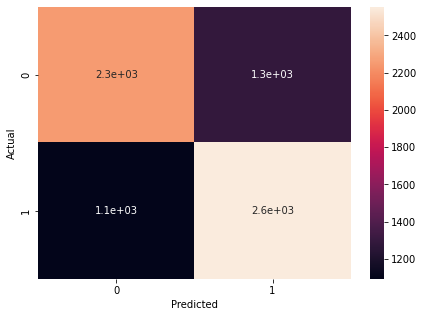

In [140]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")

# 12) Classification Report

In [141]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65      3347
         1.0       0.70      0.66      0.68      3844

    accuracy                           0.67      7191
   macro avg       0.67      0.67      0.67      7191
weighted avg       0.67      0.67      0.67      7191



# 13) Exporting Model using Pickle

In [142]:
pickle.dump(RFC, open('pickled_RFC.pkl', 'wb'))